## Importar librerias

In [1]:
from __future__ import division
from pyomo.environ import *

from pyomo.opt import SolverFactory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

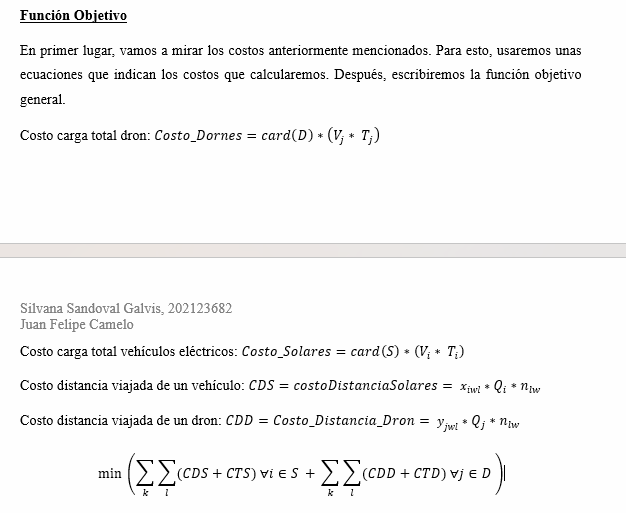

12 matrices de distancia de depots a cliente

In [2]:

Model = ConcreteModel()

# Data de entrada
drones = 2
solar = 2


locs=RangeSet(0, drones)
travelers = RangeSet(1,solar)

#Conjunto
depots = pd.read_csv('data\multi_depots.csv')
clientes = pd.read_csv('data\clients.csv')

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\c'
C:\Users\silva\AppData\Local\Temp\ipykernel_33024\3544086699.py:12: SyntaxWarning: invalid escape sequence '\m'
  depots = pd.read_csv('data\multi_depots.csv')
C:\Users\silva\AppData\Local\Temp\ipykernel_33024\3544086699.py:13: SyntaxWarning: invalid escape sequence '\c'
  clientes = pd.read_csv('data\clients.csv')


In [3]:
depots

,DepotID,Longitude,Latitude
0,1,-74.081242,4.750212
1,2,-74.109934,4.536383
2,3,-74.038548,4.792926
3,4,-74.067069,4.721678
4,5,-74.138263,4.607707
5,6,-74.124002,4.650463
6,7,-74.095619,4.621912
7,8,-74.109756,4.678961
8,9,-74.095472,4.735973
9,10,-74.109916,4.550641


In [4]:
clientes

,ClientID,DepotID,Demand,Longitude,Latitude
0,1,12,16,-74.129185,4.596340
1,2,1,17,-74.023422,4.755849
2,3,9,12,-74.062616,4.737073
3,4,11,13,-74.091980,4.718091
4,5,7,11,-74.099074,4.599326
5,6,7,12,-74.129850,4.574081
6,7,12,7,-74.148879,4.623950
7,8,5,20,-74.089509,4.592782
8,9,12,7,-74.132077,4.564187
9,10,4,7,-74.076502,4.697451


Construir las matrices.

In [5]:
import numpy as np

# Dimensiones de la matriz
long_depots = len(depots)
long_clientes = len(clientes)
len_total = long_clientes + long_depots

# Inicialización de la matriz de distancias con 999
matriz = np.full((len_total, len_total), 999)

# Cálculo de distancias entre depósitos y clientes
for i in range(long_depots):
    longitud_origen = depots.iloc[i, 1]
    latitud_origen = depots.iloc[i, 2]

    for j in range(long_clientes):
        longitud_destino = clientes.iloc[j, 1]
        latitud_destino = clientes.iloc[j, 2]

        norma = np.sqrt((longitud_origen - longitud_destino)**2 + (latitud_origen - latitud_destino)**2)
        matriz[i, j + long_depots] = norma  # De depósito a cliente
        matriz[j + long_depots, i] = norma  # De cliente a depósito

# Cálculo de distancias entre clientes
for i in range(long_clientes):
    longitud_origen = clientes.iloc[i, 1]
    latitud_origen = clientes.iloc[i, 2]

    for j in range(i + 1, long_clientes):  # Solo para j > i (matriz simétrica)
        longitud_destino = clientes.iloc[j, 1]
        latitud_destino = clientes.iloc[j, 2]

        norma = np.sqrt((longitud_origen - longitud_destino)**2 + (latitud_origen - latitud_destino)**2)
        matriz[i + long_depots, j + long_depots] = norma
        matriz[j + long_depots, i + long_depots] = norma


In [6]:
matriz


array([[999, 999, 999, ...,  78,  80,  86],
       [999, 999, 999, ...,  78,  80,  86],
       [999, 999, 999, ...,  78,  80,  86],
       ...,
       [ 78,  78,  78, ..., 999,   2,   8],
       [ 80,  80,  80, ...,   2, 999,   6],
       [ 86,  86,  86, ...,   8,   6, 999]])

In [7]:
matriz.shape

(60, 60)

In [8]:
matriz_demandas = np.full((len(matriz[0])),0)
# Cálculo de demanda clientes
for i in range(long_clientes):
    matriz_demandas[i+long_depots] = int(clientes.iloc[i,2])

In [9]:
matriz_demandas

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16, 17, 12, 13, 11,
       12,  7, 20,  7,  7, 12, 14, 17, 12, 11, 10, 18,  8, 20, 19, 17, 13,
        6,  9, 13, 13,  7, 11, 16,  8, 11,  7, 15, 12, 20, 13,  9, 14, 14,
       14,  7, 15,  8,  9,  8, 12, 12, 12])

In [10]:
matriz_demandas.shape

(60,)

Capacitated vehicle routing problem

In [11]:
costos = pd.read_csv('data\data_vehiculos.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\silva\AppData\Local\Temp\ipykernel_33024\3630518346.py:1: SyntaxWarning: invalid escape sequence '\d'
  costos = pd.read_csv('data\data_vehiculos.csv')


In [12]:
costos.head()

,Vehicle,Freight Rate [COP/km],Time Rate [COP/min],Daily Maintenance [COP/day],Recharge/Fuel Cost [COP/(gal or kWh)],Recharge/Fuel Time [min/10 percent charge],Avg. Speed [km/h],Gas Efficiency [km/gal],Electricity Efficency [kWh/km]
0,Gas Car,5000,500,30000,16000.00,0.1,NaN,10.0,NaN
1,Drone,500,500,3000,220.73,2.0,40.0,NaN,0.15
2,Solar EV,4000,500,21000,NaN,NaN,NaN,NaN,0.15


In [13]:
costos.shape

(3, 9)

In [14]:
vehiculos = pd.read_csv('data\multi_vehicles.csv')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\silva\AppData\Local\Temp\ipykernel_33024\643137212.py:1: SyntaxWarning: invalid escape sequence '\m'
  vehiculos = pd.read_csv('data\multi_vehicles.csv')


In [15]:
vehiculos

,VehicleType,Capacity,Range
0,Gas Car,132,145
1,Gas Car,135,195
2,Gas Car,114,142
3,Gas Car,157,173
4,Gas Car,108,166
5,Gas Car,108,136
6,Gas Car,125,92
7,Gas Car,78,133
8,Gas Car,95,159
9,Gas Car,98,107


In [16]:
vehiculos.shape

(24, 3)

In [17]:
costo_mantenimiento = 0
for i in range(vehiculos.shape[0]):
    vehiculo = vehiculos.iloc[i,0]
    print(vehiculo)
    if vehiculo == "Gas Car":
        print("Entró Gas")
        costo_mantenimiento += 5000
    elif vehiculo == "EV":
        costo_mantenimiento += 4000
        print("Entró EV")
    elif vehiculo == "drone":
        costo_mantenimiento += 500


Gas Car
Entró Gas
Gas Car
Entró Gas
Gas Car
Entró Gas
Gas Car
Entró Gas
Gas Car
Entró Gas
Gas Car
Entró Gas
Gas Car
Entró Gas
Gas Car
Entró Gas
Gas Car
Entró Gas
Gas Car
Entró Gas
EV
Entró EV
EV
Entró EV
EV
Entró EV
EV
Entró EV
EV
Entró EV
EV
Entró EV
EV
Entró EV
drone
drone
drone
drone
drone
drone
drone


In [18]:
costo_mantenimiento

81500

In [19]:
len(costos.iloc[0])+len(vehiculos.iloc[0])

12

In [20]:
#Matriz costos
matriz_costo = np.full((len(vehiculos),len(costos.iloc[0])+len(vehiculos.iloc[0])-1),999,dtype="float")
for i in range(len(vehiculos)):

    for j in range(1,len(vehiculos.iloc[0])):
        matriz_costo[i,j] = vehiculos.iloc[i,j]

    for k in range(1,len(costos.iloc[0])):
        print(costos.iloc[1, k])
        if vehiculos.iloc[i, 0] == "Gas Car":
            matriz_costo[i,0] = 1
            try:
                matriz_costo[i,k+len(vehiculos.iloc[0])-1] = costos.iloc[0, k]
            except:
                matriz_costo[i,k+len(vehiculos.iloc[0])] = 0
        if vehiculos.iloc[i, 0] == "EV":
            matriz_costo[i,0] = 2
            try:
                matriz_costo[i,k+len(vehiculos.iloc[0])-1] = costos.iloc[1, k]
            except:
                matriz_costo[i,k+len(vehiculos.iloc[0])-1] = 0
        if vehiculos.iloc[i, 0] == "drone":
            matriz_costo[i,0] = 3
            try:
                matriz_costo[i,k+len(vehiculos.iloc[0])-1] = costos.iloc[2, k]
            except:
                matriz_costo[i,k+len(vehiculos.iloc[0])-1] = 0


500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15
500
500
3000
220.73
2.0
40.0
nan
0.15


In [21]:
matriz_costo

array([[1.0000e+00, 1.3200e+02, 1.4500e+02, 5.0000e+03, 5.0000e+02,
        3.0000e+04, 1.6000e+04, 1.0000e-01,        nan, 1.0000e+01,
               nan],
       [1.0000e+00, 1.3500e+02, 1.9500e+02, 5.0000e+03, 5.0000e+02,
        3.0000e+04, 1.6000e+04, 1.0000e-01,        nan, 1.0000e+01,
               nan],
       [1.0000e+00, 1.1400e+02, 1.4200e+02, 5.0000e+03, 5.0000e+02,
        3.0000e+04, 1.6000e+04, 1.0000e-01,        nan, 1.0000e+01,
               nan],
       [1.0000e+00, 1.5700e+02, 1.7300e+02, 5.0000e+03, 5.0000e+02,
        3.0000e+04, 1.6000e+04, 1.0000e-01,        nan, 1.0000e+01,
               nan],
       [1.0000e+00, 1.0800e+02, 1.6600e+02, 5.0000e+03, 5.0000e+02,
        3.0000e+04, 1.6000e+04, 1.0000e-01,        nan, 1.0000e+01,
               nan],
       [1.0000e+00, 1.0800e+02, 1.3600e+02, 5.0000e+03, 5.0000e+02,
        3.0000e+04, 1.6000e+04, 1.0000e-01,        nan, 1.0000e+01,
               nan],
       [1.0000e+00, 1.2500e+02, 9.2000e+01, 5.0000e+03, 5.

In [22]:
matriz_costo.shape

(24, 11)

In [23]:
range_nodos = RangeSet(0,len_total)
range_vehiculos = RangeSet(0,len(vehiculos))
range_depots = RangeSet(0,long_depots)

In [24]:
class SensorPlacementModel:
    def __init__(self, matriz_distancias, matriz_costos, range_nodos, range_vehiculos, range_depots, len_total, matriz_demandas, costo_manteminiento):


        self.matriz_distancias = matriz_distancias
        self.matriz_costos = matriz_costos
        self.range_nodos = range_nodos
        self.range_vehiculos = range_vehiculos
        self.range_depots = range_depots
        self.len_total = len_total
        self.matriz_demandas = matriz_demandas
        self.costo_mantenimiento = costo_manteminiento
        print("data cargada")

        # Create the Pyomo model
        self.model = ConcreteModel()
        print("Modelo creado")

    def build_model(self):
        """
        Build the optimization model.
        """
        model = self.model

        #Variable de decisión
        model.x = Var(self.range_nodos, self.range_nodos, self.range_vehiculos, domain= Binary, initialize=0)

        #Variable Auxiliar
        model.u = Var(self.range_nodos, self.range_vehiculos,domain= NonNegativeReals)
        print("variables creadas")

        # Función objetivo
        def obj_expression(model):
            cosot_distancia = sum(model.x[i,j,k]*self.matriz_distancias[i,j]*self.matriz_costos[k,1] for i in self.range_nodos for j in self.range_nodos for k in self.range_vehiculos)

            costo_tiempo_viaje = sum(model.x[i,j,k]*self.matriz_distancias[i,j]/self.matriz_costos[k,8]*self.matriz_costos[k,4] for i in self.range_nodos for j in self.range_nodos for k in self.range_vehiculos)


            #lo primero es lo que vale el combustible y lo segundo el tiempo
            costo_refuel = sum(
            model.x[i, j, k] * self.matriz_distancias[i, j] * self.matriz_costos[k, 6] * 
            (self.matriz_costos[k, 9]**-1 if self.matriz_costos[0] == 1 else self.matriz_costos[k, 10]) +
            model.x[i, j, k] * self.matriz_distancias[i, j] * self.matriz_costos[k, 7] * self.matriz_costos[w,4] * 10 *
            (self.matriz_costos[k, 9]**-1 if self.matriz_costos[0] == 1 else self.matriz_costos[k, 10])
            for i in self.range_nodos
            for j in self.range_nodos
            for k in self.range_vehiculos)


            costo_recharge = sum(model.x[i,j,k]*self.matriz_distancias[i,j]*self.matriz_costos[k,6] for i in self.range_nodos for j in self.range_nodos for k in self.range_vehiculos)

            return cosot_distancia + costo_tiempo_viaje + self.costo_mantenimiento + costo_refuel + costo_recharge

        model.obj = Objective(rule=obj_expression, sense=minimize)
        print("expresión objetivo creada")

        #Restricciones
        model.entrada = ConstraintList()
        model.salida = ConstraintList()
        model.entrada_salida = ConstraintList()
        for j in self.range_nodos:
            if j != 0:
                model.entrada.add(sum(Model.x[i,j,k] for k in self.range_vehiculos for i in self.range_nodos if i!= j) == 1) # and i!=0
                model.salida.add(sum(Model.x[j,i,k] for k in self.range_vehiculos for i in self.range_nodos if i!= j) == 1) # and i!=0
            else:
                model.entrada_salida.add(sum(Model.x[i,j,k] for k in self.range_vehiculos for i in self.range_nodos if i!= j) == sum(Model.x[j,i,k] for k in self.range_vehiculos for i in self.range_nodos if i!= j))
             
        model.unico_repartidor_por_nodos = ConstraintList()
        for k in self.range_vehiculos:
            for j in self.range_nodos:
                model.unico_repartidor_por_nodos.add(sum(Model.x[i,j,k] for i in self.range_nodos if i!= j) == sum(Model.x[j,i,k]  for i in self.range_nodos if i!= j))

        model.salida = ConstraintList()
        for k in range_vehiculos:
            for i in range_depots:
                model.salida.add(sum(Model.x[i,j,k] for j in self.range_nodos if j != 0) == 1)

        model.MTZ_1 = ConstraintList()
        for k in range_vehiculos:
            for i in range_nodos:
                for j in range_nodos:
                        if i != j and i != 0 and j != 0:
                            model.MTZ_1.add(Model.u[i,k]-Model.u[j,k]+(self.len_total)*Model.x[i,j,k] <= (self.len_total - 1))

        model.MTZ_2 = ConstraintList()
        for k in self.range_vehiculos:
            model.MTZ_2.add(Model.u[0,k] == 1)

        model.capacidades = ConstraintList()
        model.rangos = ConstraintList()
        for k in range_vehiculos:
            model.capacidades.add(sum(Model.x[i,j,k]*self.matriz_demandas[j]) <= self.matriz_costo[1])
            model.rangos.add(sum(Model.x[i,j,k]*self.matriz_distancias[i, j]) <= self.matriz_costo[2])

        return model
    
    print("restricciones creadas")
    def solve_model(self):
        """
        Solve the model using the given solver.
        """
        solver = pyomo.SolverFactory('highs' )
        results = solver.solve(self.model)
        return results

    def display_results(self):
        """
        Display the results of the optimization.
        """
        self.model.display()


restricciones creadas


## Caso Base

In [25]:
clientes = pd.read_csv('case_1_base\case_1_base\Clients.csv')

vehiculos = pd.read_csv('case_1_base\case_1_base\multi_vehicles.csv')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\silva\AppData\Local\Temp\ipykernel_33024\1924500009.py:1: SyntaxWarning: invalid escape sequence '\c'
  clientes = pd.read_csv('case_1_base\case_1_base\Clients.csv')
C:\Users\silva\AppData\Local\Temp\ipykernel_33024\1924500009.py:3: SyntaxWarning: invalid escape sequence '\c'
  vehiculos = pd.read_csv('case_1_base\case_1_base\multi_vehicles.csv')


In [26]:
instancia = SensorPlacementModel(matriz_distancias=matriz, matriz_costos=matriz_costo, range_nodos=range_nodos, range_vehiculos=range_vehiculos, range_depots=range_depots, len_total=len_total, matriz_demandas=matriz_demandas, costo_manteminiento=costo_mantenimiento)

data cargada
Modelo creado


In [27]:
instancia.build_model()

variables creadas
ERROR: Rule failed when generating expression for Objective obj with index
None: IndexError: index 24 is out of bounds for axis 0 with size 24
ERROR: Constructing component 'obj' from data=None failed:
        IndexError: index 24 is out of bounds for axis 0 with size 24


IndexError: index 24 is out of bounds for axis 0 with size 24